In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# Used for Confusion Matrix
from sklearn import metrics
import seaborn as sns

# Used for Loading MNIST
from struct import unpack


In [2]:
def loadmnist(imagefile, labelfile):

    # Open the images with gzip in read binary mode
    images = open(imagefile, 'rb')
    labels = open(labelfile, 'rb')

    # Get metadata for images
    images.read(4)  # skip the magic_number
    number_of_images = images.read(4)
    number_of_images = unpack('>I', number_of_images)[0]
    rows = images.read(4)
    rows = unpack('>I', rows)[0]
    cols = images.read(4)
    cols = unpack('>I', cols)[0]

    # Get metadata for labels
    labels.read(4)
    N = labels.read(4)
    N = unpack('>I', N)[0]

    # Get data
    x = np.zeros((N, rows*cols), dtype=np.uint8)  # Initialize numpy array
    y = np.zeros(N, dtype=np.uint8)  # Initialize numpy array
    for i in range(N):
        for j in range(rows*cols):
            tmp_pixel = images.read(1)  # Just a single byte
            tmp_pixel = unpack('>B', tmp_pixel)[0]
            x[i][j] = tmp_pixel
        tmp_label = labels.read(1)
        y[i] = unpack('>B', tmp_label)[0]

    images.close()
    labels.close()
    return (x, y)

In [3]:
train_img, train_lbl = loadmnist('E:/Works/Visual Studio/Artificial Intelligence/Data/Logistic-Regression/train-images.idx3-ubyte'
                                 , 'E:/Works/Visual Studio/Artificial Intelligence/Data/Logistic-Regression/train-labels.idx1-ubyte')
test_img, test_lbl = loadmnist('E:/Works/Visual Studio/Artificial Intelligence/Data/Logistic-Regression/t10k-images.idx3-ubyte'
                               , 'E:/Works/Visual Studio/Artificial Intelligence/Data/Logistic-Regression/t10k-labels.idx1-ubyte')

In [4]:
print(train_img.shape)

(60000, 784)


In [5]:
print(train_lbl.shape)

(60000,)


In [6]:
print(test_img.shape)

(10000, 784)


In [7]:
print(test_lbl.shape)

(10000,)


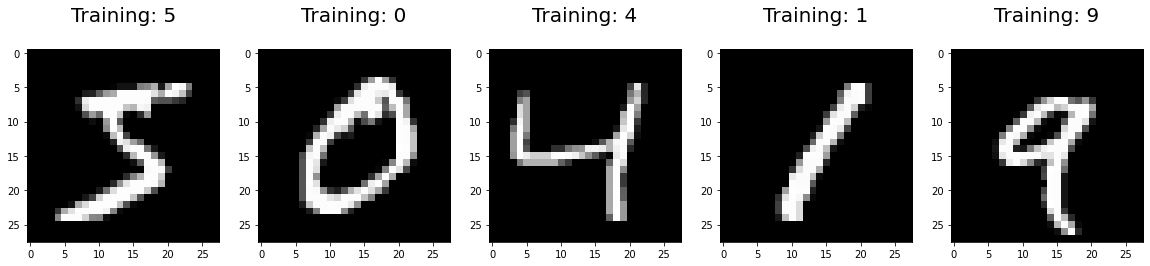

In [8]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(train_img[0:5], train_lbl[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [9]:
# This is how the computer sees the number 5
print(train_img[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [10]:
from sklearn.linear_model import LogisticRegression

In [11]:
# all parameters not specified are set to their defaults
# default solver is incredibly slow thats why we change it
logisticRegr = LogisticRegression(solver = 'lbfgs')

In [12]:
logisticRegr.fit(train_img, train_lbl)

C:\Users\Admin\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression()

In [13]:
# Returns a NumPy Array
# Predict for One Observation (image)
logisticRegr.predict(test_img[0].reshape(1,-1))

array([7], dtype=uint8)

In [14]:
# Predict for Multiple Observations (images) at Once
logisticRegr.predict(test_img[0:10])

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9], dtype=uint8)

In [15]:
score = logisticRegr.score(test_img, test_lbl)
print(score)

0.9255


In [16]:
# Make predictions on test data
predictions = logisticRegr.predict(test_img)

In [17]:
cm = metrics.confusion_matrix(test_lbl, predictions)
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

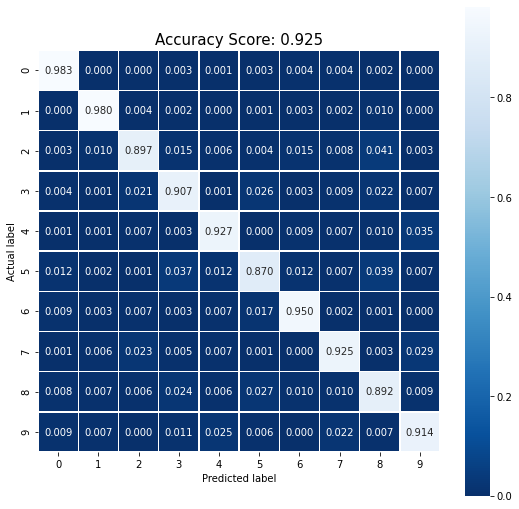

In [18]:

plt.figure(figsize=(9,9))
sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {:.3f}'.format(score) 
plt.title(all_sample_title, size = 15);

In [19]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(test_lbl, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1

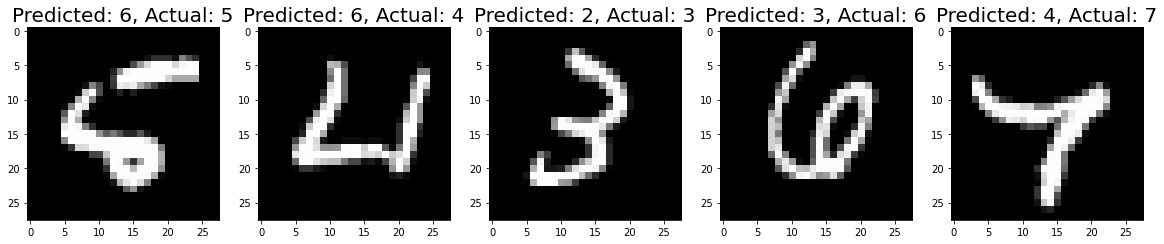

In [20]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(test_img[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], test_lbl[badIndex]), fontsize = 20)

In [21]:
regr = LogisticRegression(solver = 'lbfgs')

C:\Users\Admin\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\Admin\AppData\Local\Programs\Python\Python36-32\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https:

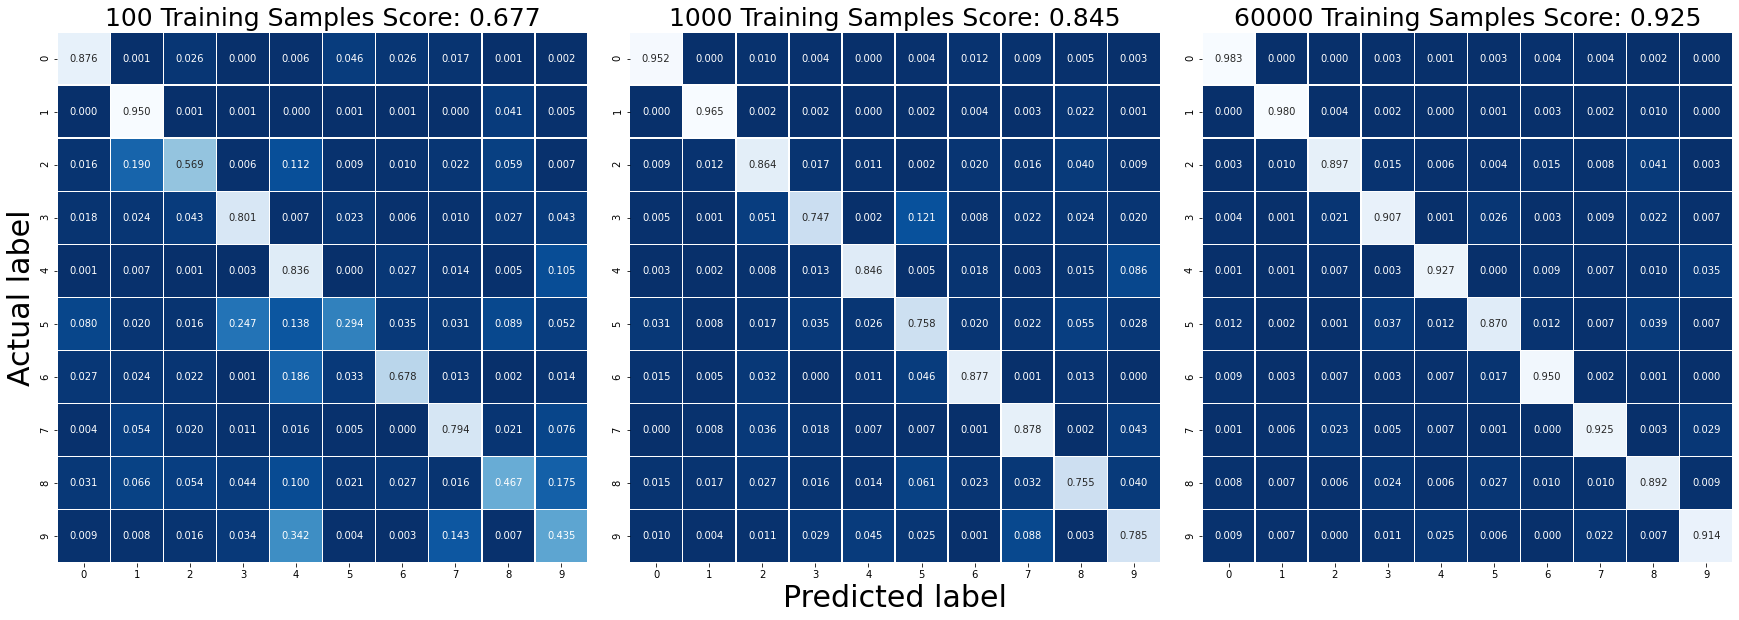

In [22]:
fig, axes = plt.subplots(nrows = 1, ncols = 3, figsize = (24,8));
plt.tight_layout()

for plotIndex, sample_size in enumerate([100, 1000, 60000]):
    X_train = train_img[:sample_size].reshape(sample_size, 784)
    y_train = train_lbl[:sample_size]
    regr.fit(X_train, y_train)
    predicted = regr.predict(test_img)
    cm = metrics.confusion_matrix(test_lbl, predicted)
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm_normalized, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r', ax = axes[plotIndex], cbar = False);
    accuracyString = '{:g} Training Samples Score: {:.3f}'.format(sample_size, regr.score(test_img, test_lbl)) 
    axes[plotIndex].set_title(accuracyString, size = 25);

axes[0].set_ylabel('Actual label', fontsize = 30);
axes[1].set_xlabel('Predicted label', fontsize = 30);